# F4 : Shifted_Rastrigin_F4_Dim50

In [14]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pygmo as pg
import math
import time

In [15]:
#set desktop or system path
import sys
sys.path.append('C:\\DCHAVAN\\DSTI-Masters\\Curriculum\\2020\\Metaheuristics\\Assignment\\Project\\DataF1F6')

In [16]:
dataf4 = pd.read_csv("f4.csv")
rastrign_data = dataf4["f4data"].tolist()
dataf4.head(10)

,f4data
0,-4.865724
1,-4.853712
2,-4.725347
3,-4.719201
4,-4.678123
5,-4.421938
6,-4.371659
7,-4.274978
8,-4.248595
9,-4.084307


In [17]:
# Function parameters
D = 50
bias = -330
popsize = 200
lower_bound = -5
upper_bound = 5

In [18]:
# Shifted_Rosenbrock function with the parameters
def function(x, data, dim, f_bias):
    F = 0
    for i in range(dim - 1):
        z = x[i] - data[i]
        F += (z ** 2) - (10 * math.cos(2 * math.pi * z)) + 10
    fc = F + f_bias
    return fc

In [6]:
class rastrigin1:
    def __init__(self, dim, lower_bound, upper_bound, minim, bias):
        self.dim = dim
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.minim = minim
        self.bias = bias

    def fitness(self, x):
        fc = [function(x, self.minim, self.dim, self.bias)]
        return fc

    def get_bounds(self):
        xmin = self.lower_bound * np.ones(self.dim)
        xmax = self.upper_bound * np.ones(self.dim)
        return xmin, xmax

In [19]:
def solver(dimension, lower_bound, upper_bound, minim, bias, popsize):
    global algo
    global pop
    global niter
    global log
    global curve
    gen=2000
    prob = pg.problem(rastrigin1(dimension, lower_bound, upper_bound, minim, bias))
    algo = pg.algorithm(pg.sade(gen=gen, variant=2, variant_adptv=1, ftol=1e-06, xtol=1e-06))
    algo.set_verbosity(1)
    pop = pg.population(prob, popsize)
    pop = algo.evolve(pop)
    log = algo.extract(pg.sade).get_log()
    curve = [x[2] for x in log]
    niter = log[-1][0]
    return prob, algo, pop, log, niter, curve

In [20]:
def plot_fitness(solution):
    fig = plt.figure(figsize=(16, 13))
    plt.plot(solution)

In [21]:
plt.show()

In [22]:
# Solve the problem
solver(D, lower_bound, upper_bound, rastrign_data, bias, popsize)

(Problem name: <class '__main__.rastrigin1'>
 	C++ class name: class pybind11::object
 
 	Global dimension:			50
 	Integer dimension:			0
 	Fitness dimension:			1
 	Number of objectives:			1
 	Equality constraints dimension:		0
 	Inequality constraints dimension:	0
 	Lower bounds: [-5, -5, -5, -5, -5, ... ]
 	Upper bounds: [5, 5, 5, 5, 5, ... ]
 	Has batch fitness evaluation: false
 
 	Has gradient: false
 	User implemented gradient sparsity: false
 	Has hessians: false
 	User implemented hessians sparsity: false
 
 	Fitness evaluations: 0
 
 	Thread safety: none,
 Algorithm name: saDE: Self-adaptive Differential Evolution [stochastic]
 	C++ class name: class pagmo::sade
 
 	Thread safety: basic
 
 Extra info:
 	Generations: 2000
 	Variant: 2
 	Self adaptation variant: 1
 	Stopping xtol: 1e-06
 	Stopping ftol: 1e-06
 	Memory: false
 	Verbosity: 1
 	Seed: 4007045531,
 Problem name: <class '__main__.rastrigin1'>
 	C++ class name: class pybind11::object
 
 	Global dimension:			50
 	Intege

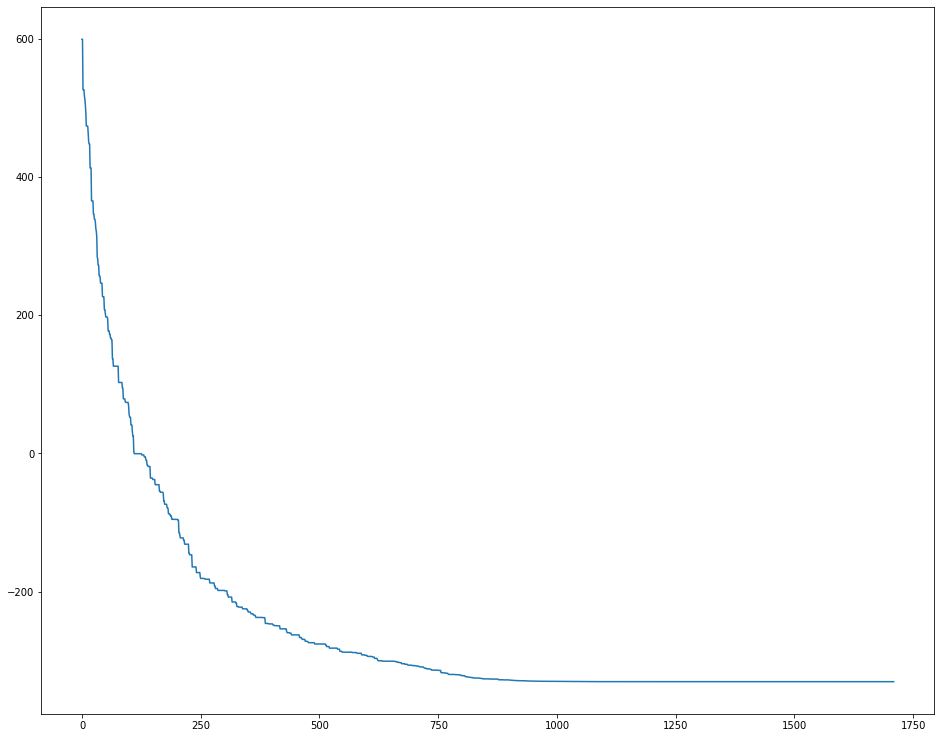

In [23]:
plot_fitness(curve)

In [24]:
f4_sol = pd.DataFrame(pop.champion_x, columns=[''])
f4_sol.to_csv("f4_rastrigin50.csv", sep=",")